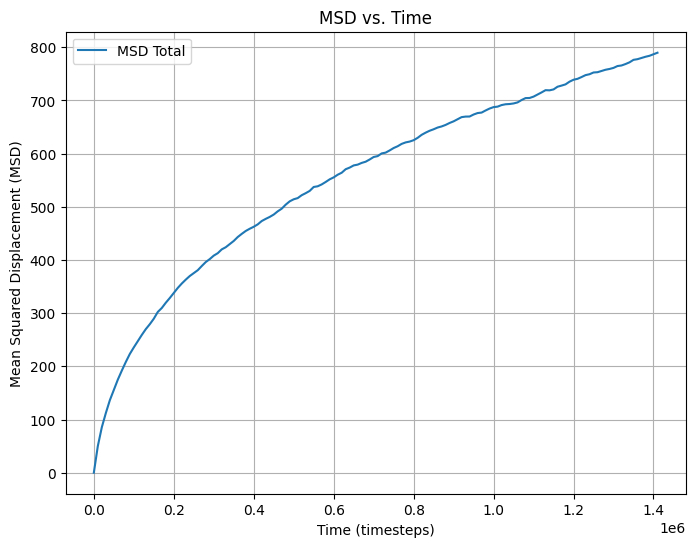

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the file name
filename = 'msd_swi6.txt'

# Initialize lists to store time and MSD values
time = []
msd_total = []

# Read the file
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):  # Skip comment lines
            continue
        data = line.split()
        time.append(float(data[0]))
        msd_total.append(float(data[4]))  # Assuming the total MSD is the 5th column (index 4)

# Convert lists to numpy arrays for easier handling
time = np.array(time)
msd_total = np.array(msd_total)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(time, msd_total, label='MSD Total')
plt.xlabel('Time (timesteps)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs. Time')
plt.legend()
plt.grid(True)
plt.show()


Fitted parameters: D = 1.5568186009365097, beta = 0.4406420577384609


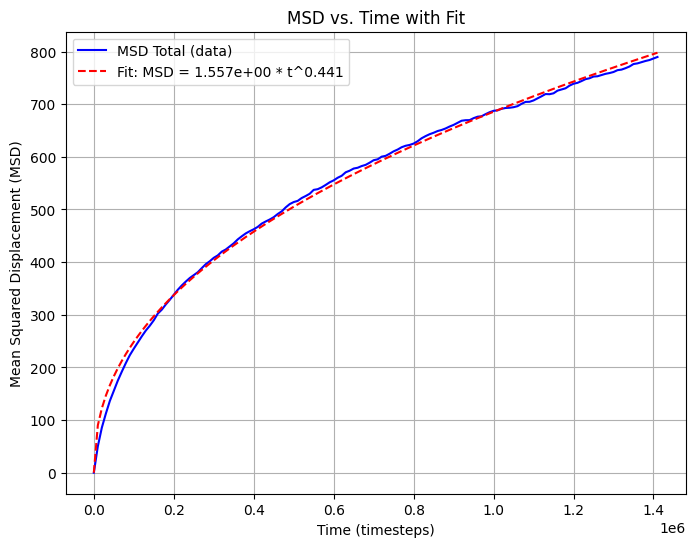

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the file name
filename = 'msd_swi6.txt'

# Initialize lists to store time and MSD values
time = []
msd_total = []

# Read the file
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):  # Skip comment lines
            continue
        data = line.split()
        time.append(float(data[0]))
        msd_total.append(float(data[4]))  # Assuming the total MSD is the 5th column (index 4)

# Convert lists to numpy arrays for easier handling
time = np.array(time)
msd_total = np.array(msd_total)

# Define the model function for fitting
def msd_model(t, D, beta):
    return D * t**beta

# Perform the curve fitting
popt, pcov = curve_fit(msd_model, time, msd_total)
D, beta = popt
print(f"Fitted parameters: D = {D}, beta = {beta}")

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(time, msd_total, 'b-', label='MSD Total (data)')
plt.plot(time, msd_model(time, D, beta), 'r--', label=f'Fit: MSD = {D:.3e} * t^{beta:.3f}')
plt.xlabel('Time (timesteps)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs. Time with Fit')
plt.legend()
plt.grid(True)
plt.show()


Fitted parameters for power-law model: D = 1.5568186009365097, beta = 0.4406420577384609


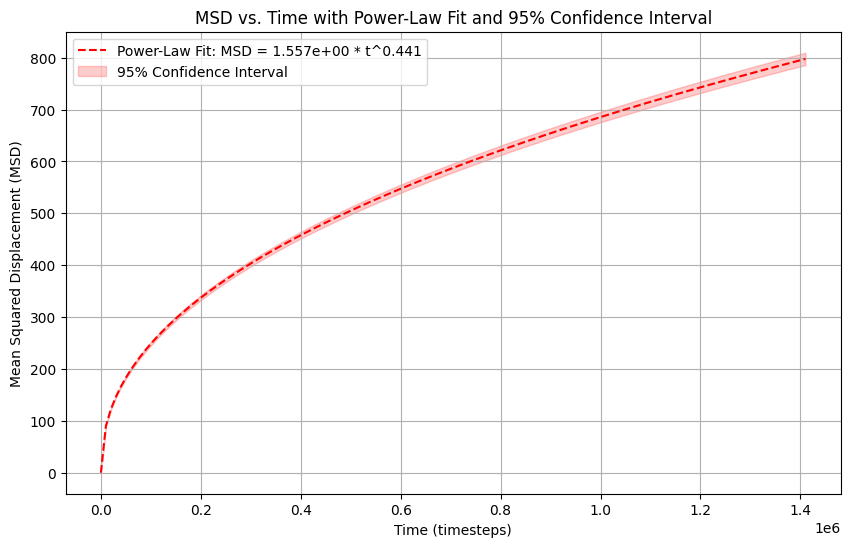

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy

# Define the file name
filename = 'msd_swi6.txt'

# Initialize lists to store time and MSD values
time = []
msd_total = []
msd_error = []  # Initialize list for MSD errors if available

# Read the file
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):  # Skip comment lines
            continue
        data = line.split()
        time.append(float(data[0]))
        msd_total.append(float(data[4]))  # Assuming the total MSD is the 5th column (index 4)
        if len(data) > 5:  # Assuming errors are in the 6th column if available
            msd_error.append(float(data[5]))

# Convert lists to numpy arrays for easier handling
time = np.array(time)
msd_total = np.array(msd_total)
msd_error = np.array(msd_error) if msd_error else None

# Define the power-law model function for fitting
def power_law_model(t, D, beta):
    return D * t**beta

# Perform the power-law fit (MSD = Dt^beta)
popt, pcov = curve_fit(power_law_model, time, msd_total, sigma=msd_error, absolute_sigma=True)
D, beta = popt
print(f"Fitted parameters for power-law model: D = {D}, beta = {beta}")

# Calculate the 95% confidence intervals
alpha = 0.05  # 95% confidence interval
n = len(msd_total)  # number of data points
p = len(popt)  # number of parameters
dof = max(0, n - p)  # degrees of freedom
tval = scipy.stats.t.ppf(1.0 - alpha / 2., dof)  # student-t value for the 95% confidence interval

# Convert covariance matrix to parameter standard deviations
perr = np.sqrt(np.diag(pcov))

# Define the model with error bands
fit = power_law_model(time, *popt)
lower_bound = power_law_model(time, *(popt - tval * perr))
upper_bound = power_law_model(time, *(popt + tval * perr))

# Create the plot
plt.figure(figsize=(10, 6))
#plt.errorbar(time, msd_total, yerr=msd_error, fmt='o', label='MSD Total (data)', ecolor='gray', capsize=3)
plt.plot(time, fit, 'r--', label=f'Power-Law Fit: MSD = {D:.3e} * t^{beta:.3f}')
plt.fill_between(time, lower_bound, upper_bound, color='r', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Time (timesteps)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.title('MSD vs. Time with Power-Law Fit and 95% Confidence Interval')
plt.legend()
plt.grid(True)
plt.show()


Fitted parameters for power-law model: D = 1.5568186009365097, beta = 0.4406420577384609


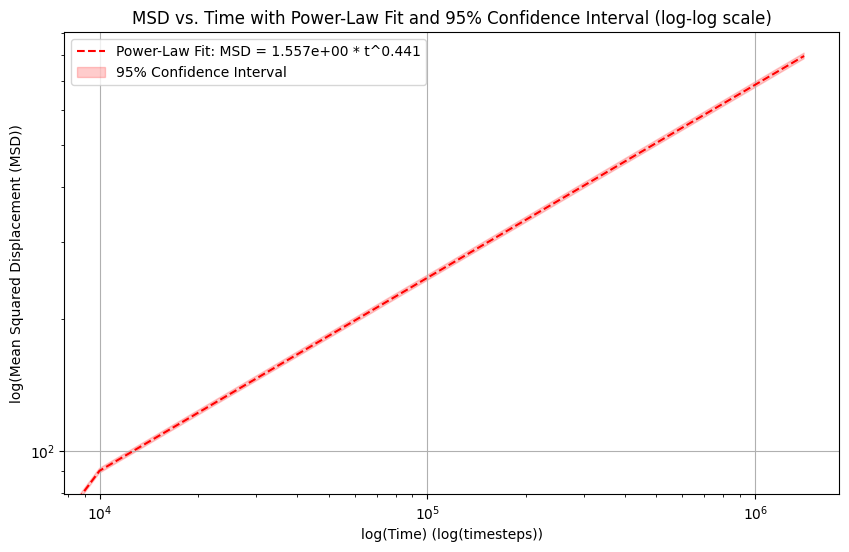

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the file name
filename = 'msd_swi6.txt'

# Initialize lists to store time and MSD values
time = []
msd_total = []
msd_error = []  # Initialize list for MSD errors if available

# Read the file
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):  # Skip comment lines
            continue
        data = line.split()
        time.append(float(data[0]))
        msd_total.append(float(data[4]))  # Assuming the total MSD is the 5th column (index 4)
        if len(data) > 5:  # Assuming errors are in the 6th column if available
            msd_error.append(float(data[5]))

# Convert lists to numpy arrays for easier handling
time = np.array(time)
msd_total = np.array(msd_total)
msd_error = np.array(msd_error) if msd_error else None

# Define the power-law model function for fitting
def power_law_model(t, D, beta):
    return D * t**beta

# Perform the power-law fit (MSD = Dt^beta)
popt, pcov = curve_fit(power_law_model, time, msd_total, sigma=msd_error, absolute_sigma=True)
D, beta = popt
print(f"Fitted parameters for power-law model: D = {D}, beta = {beta}")

# Calculate the 95% confidence intervals
alpha = 0.05  # 95% confidence interval
n = len(msd_total)  # number of data points
p = len(popt)  # number of parameters
dof = max(0, n - p)  # degrees of freedom
tval = scipy.stats.t.ppf(1.0 - alpha / 2., dof)  # student-t value for the 95% confidence interval

# Convert covariance matrix to parameter standard deviations
perr = np.sqrt(np.diag(pcov))

# Define the model with error bands
fit = power_law_model(time, *popt)
lower_bound = power_law_model(time, *(popt - tval * perr))
upper_bound = power_law_model(time, *(popt + tval * perr))

# Create the plot
plt.figure(figsize=(10, 6))
#plt.errorbar(time, msd_total, yerr=msd_error, fmt='o', label='MSD Total (data)', ecolor='gray', capsize=3)
plt.plot(time, fit, 'r--', label=f'Power-Law Fit: MSD = {D:.3e} * t^{beta:.3f}')
plt.fill_between(time, lower_bound, upper_bound, color='r', alpha=0.2, label='95% Confidence Interval')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(Time) (log(timesteps))')
plt.ylabel('log(Mean Squared Displacement (MSD))')
plt.title('MSD vs. Time with Power-Law Fit and 95% Confidence Interval (log-log scale)')
plt.legend()
plt.grid(True)
plt.show()
